In [2]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Scikit-Learn libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


In [3]:
# Load the Iris dataset
iris = load_iris()

# Extract features (X) and target labels (y)
X = iris.data
y = iris.target

# Print dataset details
print("Feature Names:", iris.feature_names)
print("Target Names:", iris.target_names)
print("Dataset Shape:", X.shape)

# Convert to DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y  # Add target labels
df['species'] = df['species'].map({0: "Setosa", 1: "Versicolor", 2: "Virginica"})  # Convert numeric labels to names

# Display first 5 rows
df.head()


Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']
Dataset Shape: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


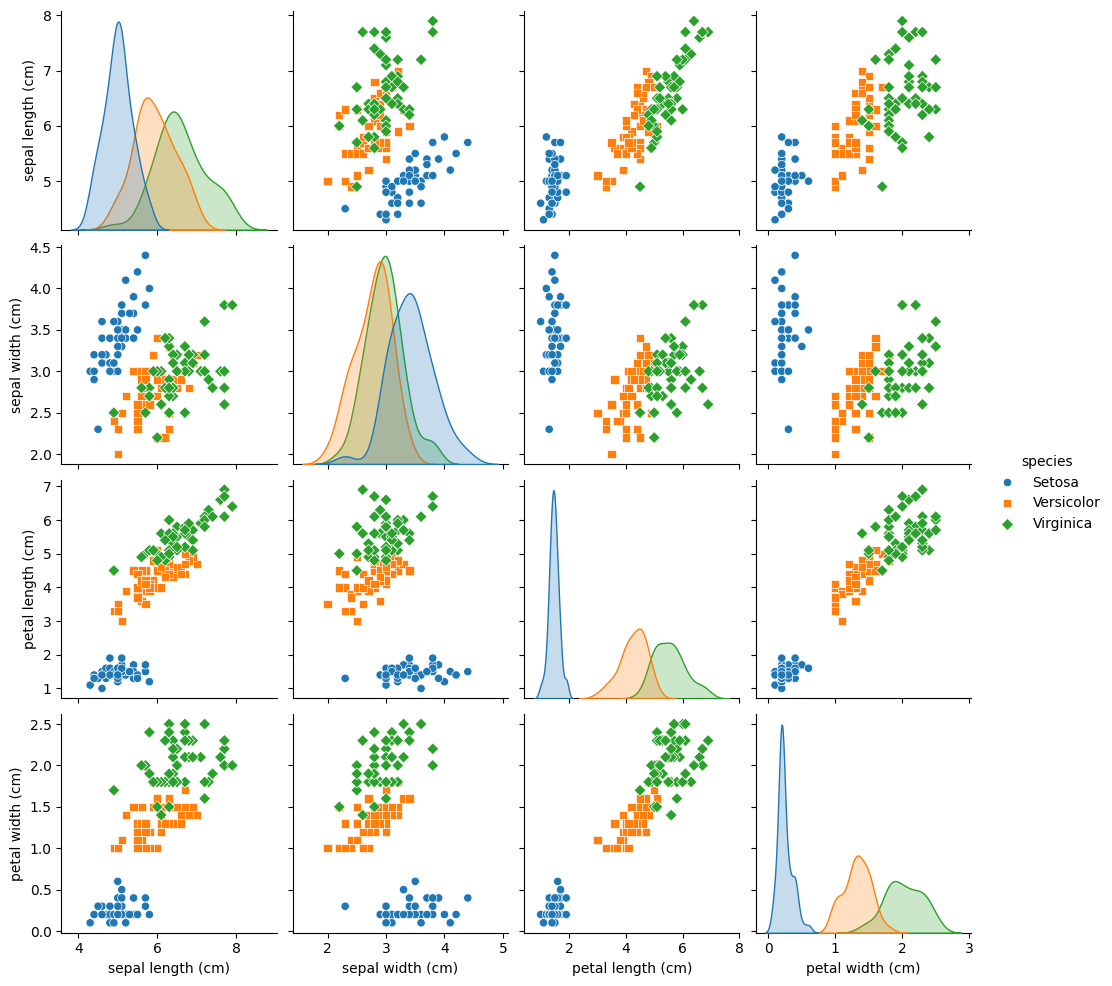

In [4]:
sns.pairplot(df, hue="species", markers=["o", "s", "D"])
plt.show()


In [5]:
# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (120, 4)
X_test shape: (30, 4)


In [6]:
from sklearn.model_selection import train_test_split

# Load the dataset
from sklearn.datasets import load_iris
iris = load_iris()

# Extract features and target variable
X = iris.data
y = iris.target

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print to confirm
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (120, 4)
X_test shape: (30, 4)


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Initialize KNN model with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [9]:
# Predict test set results
y_pred = knn.predict(X_test_scaled)


KNN Model Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



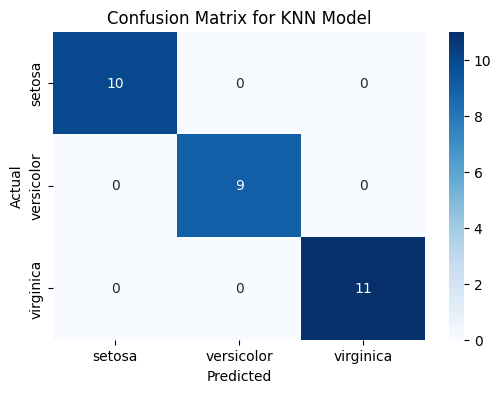

In [10]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for KNN Model")
plt.show()


In [11]:
# Save the trained KNN model
joblib.dump(knn, 'knn_iris_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [12]:
# Load the trained model
knn_loaded = joblib.load('knn_iris_model.pkl')

# Load the scaler
scaler_loaded = joblib.load('scaler.pkl')

# Example new sample (using first test sample)
new_sample = X_test[0].reshape(1, -1)  # Reshape for prediction
new_sample_scaled = scaler_loaded.transform(new_sample)  # Scale the new sample

# Predict
predicted_label = knn_loaded.predict(new_sample_scaled)[0]
print(f"Predicted species: {iris.target_names[predicted_label]}")


Predicted species: versicolor


In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Scikit-Learn functions
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (for models like SVM and Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict test set results
y_pred_lr = lr.predict(X_test)

# Evaluate Model Performance
print("\nLinear Regression Performance:")
print(f"R² Score: {lr.score(X_test, y_test):.2f}")


In [ ]:
# Initialize and train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluate Model Performance
print("\nDecision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print(classification_report(y_test, y_pred_dt))


In [ ]:
# Initialize and train the SVM model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# Evaluate Model Performance
print("\nSVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print(classification_report(y_test, y_pred_svm))


In [ ]:
# Define the Neural Network model
nn_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(4,)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

# Compile the model
nn_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train_scaled, y_train, 
                       validation_data=(X_test_scaled, y_test),
                       epochs=50, batch_size=5, verbose=1)

# Evaluate Model Performance
test_loss, test_accuracy = nn_model.evaluate(X_test_scaled, y_test)
print(f"\nNeural Network Test Accuracy: {test_accuracy:.2f}")


In [ ]:
# Compute accuracy for each model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Store model performances
model_accuracies = {
    'Decision Tree': accuracy_dt,
    'SVM': accuracy_svm,
    'Neural Network': test_accuracy
}

# Plot Model Performance
plt.figure(figsize=(8,5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.show()


In [ ]:
import joblib

# Save models
joblib.dump(lr, 'linear_regression.pkl')
joblib.dump(dt, 'decision_tree.pkl')
joblib.dump(svm, 'svm.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Save Neural Network
nn_model.save('neural_network.h5')

print("All models saved successfully!")
